**Investigating the Adoption of Research Software**

***Survey***

In [1]:
from google.colab import files
import io
uploaded = files.upload()


Saving Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx to Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx


In [2]:
file_name = next(iter(uploaded))
file_name

'Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx'

In [4]:
%matplotlib inline

import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from functools import reduce
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statistics as s



In [5]:
df = pd.read_excel(file_name)

df

,PERFIL,TEMPO_USO,FREQUENCIA_USO,IDADE,GENERO,FORMACAO,ANOS_EXPERIENCIA,UTILIZACAO_D01F01,UTILIZACAO_D01F02,UTILIZACAO_D01F03,...,QUALIDADE_D02F07,QUALIDADE_D02F08,NAO_ADOCAO_D03F01,NAO_ADOCAO_D03F02,NAO_ADOCAO_D03F03,NAO_ADOCAO_D03F04,NAO_ADOCAO_D03F05,NAO_ADOCAO_D03F06,NAO_ADOCAO_D03F07,NAO_ADOCAO_D03F08
0,1,3,3,2,1,4,3,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,1,4,4,1,2,4,2,4,2,3,...,2,2,4,5,2,4,2,3,4,3
2,1,3,4,2,2,2,2,2,5,4,...,5,5,4,5,2,3,4,4,5,4
3,1,2,3,3,1,4,2,4,3,4,...,4,4,5,4,5,5,3,3,5,3
4,1,1,5,3,1,4,2,5,3,5,...,4,5,5,5,3,4,2,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2,4,4,2,2,4,3,4,3,4,...,4,4,5,5,4,4,3,0,4,4
169,2,2,3,2,2,4,2,4,3,5,...,2,4,5,5,4,4,2,3,2,4
170,2,1,3,1,2,2,2,3,2,4,...,4,5,4,5,3,4,3,2,4,4
171,2,4,3,2,2,5,3,4,4,5,...,4,5,5,5,5,5,1,2,5,5


In [6]:
# Selecting columns
df1 = df.loc[:, lambda df:['NAO_ADOCAO_D03F01', 'NAO_ADOCAO_D03F02', 'NAO_ADOCAO_D03F03', 'NAO_ADOCAO_D03F04', 'NAO_ADOCAO_D03F05', 'NAO_ADOCAO_D03F06', 'NAO_ADOCAO_D03F07', 'NAO_ADOCAO_D03F08' ]]
df1.columns = ['D03F01', 'D03F02','D03F03', 'D03F04', 'D03F05', 'D03F06', 'D03F07', 'D03F08']
df1

,D03F01,D03F02,D03F03,D03F04,D03F05,D03F06,D03F07,D03F08
0,5,5,5,5,5,5,5,5
1,4,5,2,4,2,3,4,3
2,4,5,2,3,4,4,5,4
3,5,4,5,5,3,3,5,3
4,5,5,3,4,2,5,4,4
...,...,...,...,...,...,...,...,...
168,5,5,4,4,3,0,4,4
169,5,5,4,4,2,3,2,4
170,4,5,3,4,3,2,4,4
171,5,5,5,5,1,2,5,5


In [7]:
df1.style.format("{:.2}").set_properties(**{'text-align': 'center'}).set_table_styles([
    dict(selector="th", props=[("text-align", "center")]),]).hide_index()


<ipython-input-7-1f36c6b33afc>:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  dict(selector="th", props=[("text-align", "center")]),]).hide_index()


ValueError: ignored

In [8]:
print("\n\033[1mReport Investigating Research Software (Survey) \033[0m")
print("\nTotal of respondents = ", len(df1))




Report Investigating Research Software (Survey) 

Total of respondents =  173


D03F01 = Not having ease of use

D03F02 = Not having documentation about the usage

D03F03 = Not having scientific disclosure about the software

D03F04 = Not have quality

D03F05 = Not having open source

D03F06 = Not to be free

D03F07 = Not having maintenance and continuous evolution

D03F08 = Not having adoption by researchers/professors

In [9]:
df1.describe().style.format("{:.4}")

,D03F01,D03F02,D03F03,D03F04,D03F05,D03F06,D03F07,D03F08
count,173.0,173.0,173.0,173.0,173.0,173.0,173.0,173.0
mean,4.231,4.064,3.202,4.41,2.775,4.087,3.896,3.694
std,1.075,1.137,1.385,0.982,1.386,1.146,1.211,1.203
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.0,4.0,2.0,4.0,2.0,3.0,3.0,3.0
50%,5.0,4.0,3.0,5.0,3.0,4.0,4.0,4.0
75%,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [10]:
df2 = df1.loc[df1['D03F01'] == 5.0]

df2['Percentual'] = (((len(df2['D03F01']))/173) *100)

df2

<ipython-input-10-79382d3c03bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Percentual'] = (((len(df2['D03F01']))/173) *100)


,D03F01,D03F02,D03F03,D03F04,D03F05,D03F06,D03F07,D03F08,Percentual
0,5,5,5,5,5,5,5,5,52.601156
3,5,4,5,5,3,3,5,3,52.601156
4,5,5,3,4,2,5,4,4,52.601156
8,5,5,4,5,4,0,4,4,52.601156
9,5,5,3,5,1,5,2,5,52.601156
...,...,...,...,...,...,...,...,...,...
165,5,5,5,5,2,5,5,5,52.601156
167,5,4,1,5,3,4,5,4,52.601156
168,5,5,4,4,3,0,4,4,52.601156
169,5,5,4,4,2,3,2,4,52.601156


In [11]:
df3_grafico = pd.DataFrame({'D03F01 (%)':[(len(df1.loc[df1['D03F01'] == 5.0])/173) *100, (len(df1.loc[df1['D03F01'] == 4.0])/173) *100, (len(df1.loc[df1['D03F01'] == 3.0])/173) *100, (len(df1.loc[df1['D03F01'] == 2.0])/173) *100, (len(df1.loc[df1['D03F01'] == 1.0])/173) *100, (len(df1.loc[df1['D03F01'] == 0.0])/173) *100],
                   'D03F02 (%)':[(len(df1.loc[df1['D03F02'] == 5.0])/173) *100, (len(df1.loc[df1['D03F02'] == 4.0])/173) *100, (len(df1.loc[df1['D03F02'] == 3.0])/173) *100, (len(df1.loc[df1['D03F02'] == 2.0])/173) *100, (len(df1.loc[df1['D03F02'] == 1.0])/173) *100, (len(df1.loc[df1['D03F02'] == 0.0])/173) *100],
                   'D03F03 (%)':[(len(df1.loc[df1['D03F03'] == 5.0])/173) *100, (len(df1.loc[df1['D03F03'] == 4.0])/173) *100, (len(df1.loc[df1['D03F03'] == 3.0])/173) *100, (len(df1.loc[df1['D03F03'] == 2.0])/173) *100, (len(df1.loc[df1['D03F03'] == 1.0])/173) *100, (len(df1.loc[df1['D03F03'] == 0.0])/173) *100],
                   'D03F04 (%)':[(len(df1.loc[df1['D03F04'] == 5.0])/173) *100, (len(df1.loc[df1['D03F04'] == 4.0])/173) *100, (len(df1.loc[df1['D03F04'] == 3.0])/173) *100, (len(df1.loc[df1['D03F04'] == 2.0])/173) *100, (len(df1.loc[df1['D03F04'] == 1.0])/173) *100, (len(df1.loc[df1['D03F04'] == 0.0])/173) *100],
                   'D03F05 (%)':[(len(df1.loc[df1['D03F05'] == 5.0])/173) *100, (len(df1.loc[df1['D03F05'] == 4.0])/173) *100, (len(df1.loc[df1['D03F05'] == 3.0])/173) *100, (len(df1.loc[df1['D03F05'] == 2.0])/173) *100, (len(df1.loc[df1['D03F05'] == 1.0])/173) *100, (len(df1.loc[df1['D03F05'] == 0.0])/173) *100],
                    'D03F06 (%)':[(len(df1.loc[df1['D03F06'] == 5.0])/173) *100, (len(df1.loc[df1['D03F06'] == 4.0])/173) *100, (len(df1.loc[df1['D03F06'] == 3.0])/173) *100, (len(df1.loc[df1['D03F06'] == 2.0])/173) *100, (len(df1.loc[df1['D03F06'] == 1.0])/173) *100, (len(df1.loc[df1['D03F06'] == 0.0])/173) *100],
                    'D03F07 (%)':[(len(df1.loc[df1['D03F07'] == 5.0])/173) *100, (len(df1.loc[df1['D03F07'] == 4.0])/173) *100, (len(df1.loc[df1['D03F07'] == 3.0])/173) *100, (len(df1.loc[df1['D03F07'] == 2.0])/173) *100, (len(df1.loc[df1['D03F07'] == 1.0])/173) *100, (len(df1.loc[df1['D03F07'] == 0.0])/173) *100],
                    'D03F08 (%)':[(len(df1.loc[df1['D03F08'] == 5.0])/173) *100, (len(df1.loc[df1['D03F08'] == 4.0])/173) *100, (len(df1.loc[df1['D03F08'] == 3.0])/173) *100, (len(df1.loc[df1['D03F08'] == 2.0])/173) *100, (len(df1.loc[df1['D03F08'] == 1.0])/173) *100, (len(df1.loc[df1['D03F08'] == 0.0])/173) *100]
                   })
# Create the index
index_ = ['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know']
df3_grafico.index = index_

pd.options.display.float_format = '{:.2f}'.format

df3_grafico

center_aligned_df = df3_grafico.style.set_properties(**{'text-align': 'center'})

center_aligned_df = center_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

pd.options.display.float_format = '{:.2f}'.format

center_aligned_df


df3_grafico


,D03F01 (%),D03F02 (%),D03F03 (%),D03F04 (%),D03F05 (%),D03F06 (%),D03F07 (%),D03F08 (%)
Very important,52.60,43.93,21.97,61.27,16.18,47.98,38.15,30.06
Important,30.06,34.10,24.86,27.75,13.87,26.59,34.68,31.79
Median important,10.40,12.72,18.50,6.36,22.54,17.92,12.72,22.54
Little important,3.47,4.62,23.70,1.73,28.90,2.89,9.25,10.40
Nothing important,1.73,2.89,8.09,1.16,15.61,2.89,3.47,3.47
I don't know,1.73,1.73,2.89,1.73,2.89,1.73,1.73,1.73


In [12]:
df3_grafico

,D03F01 (%),D03F02 (%),D03F03 (%),D03F04 (%),D03F05 (%),D03F06 (%),D03F07 (%),D03F08 (%)
Very important,52.60,43.93,21.97,61.27,16.18,47.98,38.15,30.06
Important,30.06,34.10,24.86,27.75,13.87,26.59,34.68,31.79
Median important,10.40,12.72,18.50,6.36,22.54,17.92,12.72,22.54
Little important,3.47,4.62,23.70,1.73,28.90,2.89,9.25,10.40
Nothing important,1.73,2.89,8.09,1.16,15.61,2.89,3.47,3.47
I don't know,1.73,1.73,2.89,1.73,2.89,1.73,1.73,1.73


In [13]:
df4 = df3_grafico.loc[df3_grafico.index.isin(['Very important','Important'])]
df4


,D03F01 (%),D03F02 (%),D03F03 (%),D03F04 (%),D03F05 (%),D03F06 (%),D03F07 (%),D03F08 (%)
Very important,52.60,43.93,21.97,61.27,16.18,47.98,38.15,30.06
Important,30.06,34.10,24.86,27.75,13.87,26.59,34.68,31.79


In [14]:

df5 = df4.append(df4.sum(numeric_only=True),ignore_index=True)

df5

<ipython-input-14-ca688a5b6353>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df4.append(df4.sum(numeric_only=True),ignore_index=True)


,D03F01 (%),D03F02 (%),D03F03 (%),D03F04 (%),D03F05 (%),D03F06 (%),D03F07 (%),D03F08 (%)
0,52.60,43.93,21.97,61.27,16.18,47.98,38.15,30.06
1,30.06,34.10,24.86,27.75,13.87,26.59,34.68,31.79
2,82.66,78.03,46.82,89.02,30.06,74.57,72.83,61.85


In [15]:
df3_grafico = df3_grafico.append(df4.sum(numeric_only=True),ignore_index=True)

# Create the index
index_ = ['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know', 'Total']
df3_grafico.index = index_

df3_grafico

<ipython-input-15-05e31a08c36a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3_grafico = df3_grafico.append(df4.sum(numeric_only=True),ignore_index=True)


,D03F01 (%),D03F02 (%),D03F03 (%),D03F04 (%),D03F05 (%),D03F06 (%),D03F07 (%),D03F08 (%)
Very important,52.60,43.93,21.97,61.27,16.18,47.98,38.15,30.06
Important,30.06,34.10,24.86,27.75,13.87,26.59,34.68,31.79
Median important,10.40,12.72,18.50,6.36,22.54,17.92,12.72,22.54
Little important,3.47,4.62,23.70,1.73,28.90,2.89,9.25,10.40
Nothing important,1.73,2.89,8.09,1.16,15.61,2.89,3.47,3.47
I don't know,1.73,1.73,2.89,1.73,2.89,1.73,1.73,1.73
Total,82.66,78.03,46.82,89.02,30.06,74.57,72.83,61.85


In [16]:
#df4 = df3_grafico.loc[df3_grafico.index.isin(['Very important','Important'])]
#df4

#df4['Level'] = df4.index
#df4 = df4.rename_axis('index').reset_index()

df4 = df3_grafico

df4.style.hide_index()


df5 = df4.transpose()

df5


<ipython-input-16-9ba06921a793>:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df4.style.hide_index()


,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D03F01 (%),52.60,30.06,10.40,3.47,1.73,1.73,82.66
D03F02 (%),43.93,34.10,12.72,4.62,2.89,1.73,78.03
D03F03 (%),21.97,24.86,18.50,23.70,8.09,2.89,46.82
D03F04 (%),61.27,27.75,6.36,1.73,1.16,1.73,89.02
D03F05 (%),16.18,13.87,22.54,28.90,15.61,2.89,30.06
D03F06 (%),47.98,26.59,17.92,2.89,2.89,1.73,74.57
D03F07 (%),38.15,34.68,12.72,9.25,3.47,1.73,72.83
D03F08 (%),30.06,31.79,22.54,10.40,3.47,1.73,61.85


In [17]:
df6 = df5.sort_values(['Total','Very important'] , axis = 0, ascending=[False, False])

#df6 = df5.sort_values(by='Total', axis = 0, ascending=False)

df6

,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D03F04 (%),61.27,27.75,6.36,1.73,1.16,1.73,89.02
D03F01 (%),52.60,30.06,10.40,3.47,1.73,1.73,82.66
D03F02 (%),43.93,34.10,12.72,4.62,2.89,1.73,78.03
D03F06 (%),47.98,26.59,17.92,2.89,2.89,1.73,74.57
D03F07 (%),38.15,34.68,12.72,9.25,3.47,1.73,72.83
D03F08 (%),30.06,31.79,22.54,10.40,3.47,1.73,61.85
D03F03 (%),21.97,24.86,18.50,23.70,8.09,2.89,46.82
D03F05 (%),16.18,13.87,22.54,28.90,15.61,2.89,30.06


In [18]:
df7 = df6.transpose()

df7

,D03F04 (%),D03F01 (%),D03F02 (%),D03F06 (%),D03F07 (%),D03F08 (%),D03F03 (%),D03F05 (%)
Very important,61.27,52.60,43.93,47.98,38.15,30.06,21.97,16.18
Important,27.75,30.06,34.10,26.59,34.68,31.79,24.86,13.87
Median important,6.36,10.40,12.72,17.92,12.72,22.54,18.50,22.54
Little important,1.73,3.47,4.62,2.89,9.25,10.40,23.70,28.90
Nothing important,1.16,1.73,2.89,2.89,3.47,3.47,8.09,15.61
I don't know,1.73,1.73,1.73,1.73,1.73,1.73,2.89,2.89
Total,89.02,82.66,78.03,74.57,72.83,61.85,46.82,30.06


In [19]:
df7 = df7.drop(df7.index[6])

df7

,D03F04 (%),D03F01 (%),D03F02 (%),D03F06 (%),D03F07 (%),D03F08 (%),D03F03 (%),D03F05 (%)
Very important,61.27,52.60,43.93,47.98,38.15,30.06,21.97,16.18
Important,27.75,30.06,34.10,26.59,34.68,31.79,24.86,13.87
Median important,6.36,10.40,12.72,17.92,12.72,22.54,18.50,22.54
Little important,1.73,3.47,4.62,2.89,9.25,10.40,23.70,28.90
Nothing important,1.16,1.73,2.89,2.89,3.47,3.47,8.09,15.61
I don't know,1.73,1.73,1.73,1.73,1.73,1.73,2.89,2.89


D03F01 = Not having ease of use

D03F02 = Not having documentation about the usage

D03F03 = Not having scientific disclosure about the software

D03F04 = Not have quality

D03F05 = Not having open source

D03F06 = Not to be free

D03F07 = Not having maintenance and continuous evolution

D03F08 = Not having adoption by researchers/professors

In [24]:
df7.columns = ['Not have quality','Not having ease of use', 'Not having documentation \n about the usage', 'Not to be free', 'Not having maintenance \n and continuous evolution', 'Not having adoption by \n researchers/professors', 'Not having scientific disclosure \n about the software', 'Not having open source' ]

df7


,Not have quality,Not having ease of use,Not having documentation \n about the usage,Not to be free,Not having maintenance \n and continuous evolution,Not having adoption by \n researchers/professors,Not having scientific disclosure \n about the software,Not having open source
Very important,61.27,52.60,43.93,47.98,38.15,30.06,21.97,16.18
Important,27.75,30.06,34.10,26.59,34.68,31.79,24.86,13.87
Median important,6.36,10.40,12.72,17.92,12.72,22.54,18.50,22.54
Little important,1.73,3.47,4.62,2.89,9.25,10.40,23.70,28.90
Nothing important,1.16,1.73,2.89,2.89,3.47,3.47,8.09,15.61
I don't know,1.73,1.73,1.73,1.73,1.73,1.73,2.89,2.89



  Horizontal Bar Chart - Research Software - Factors of Non-Adoption - Ordered by Combined Very Important and Important Ratings 


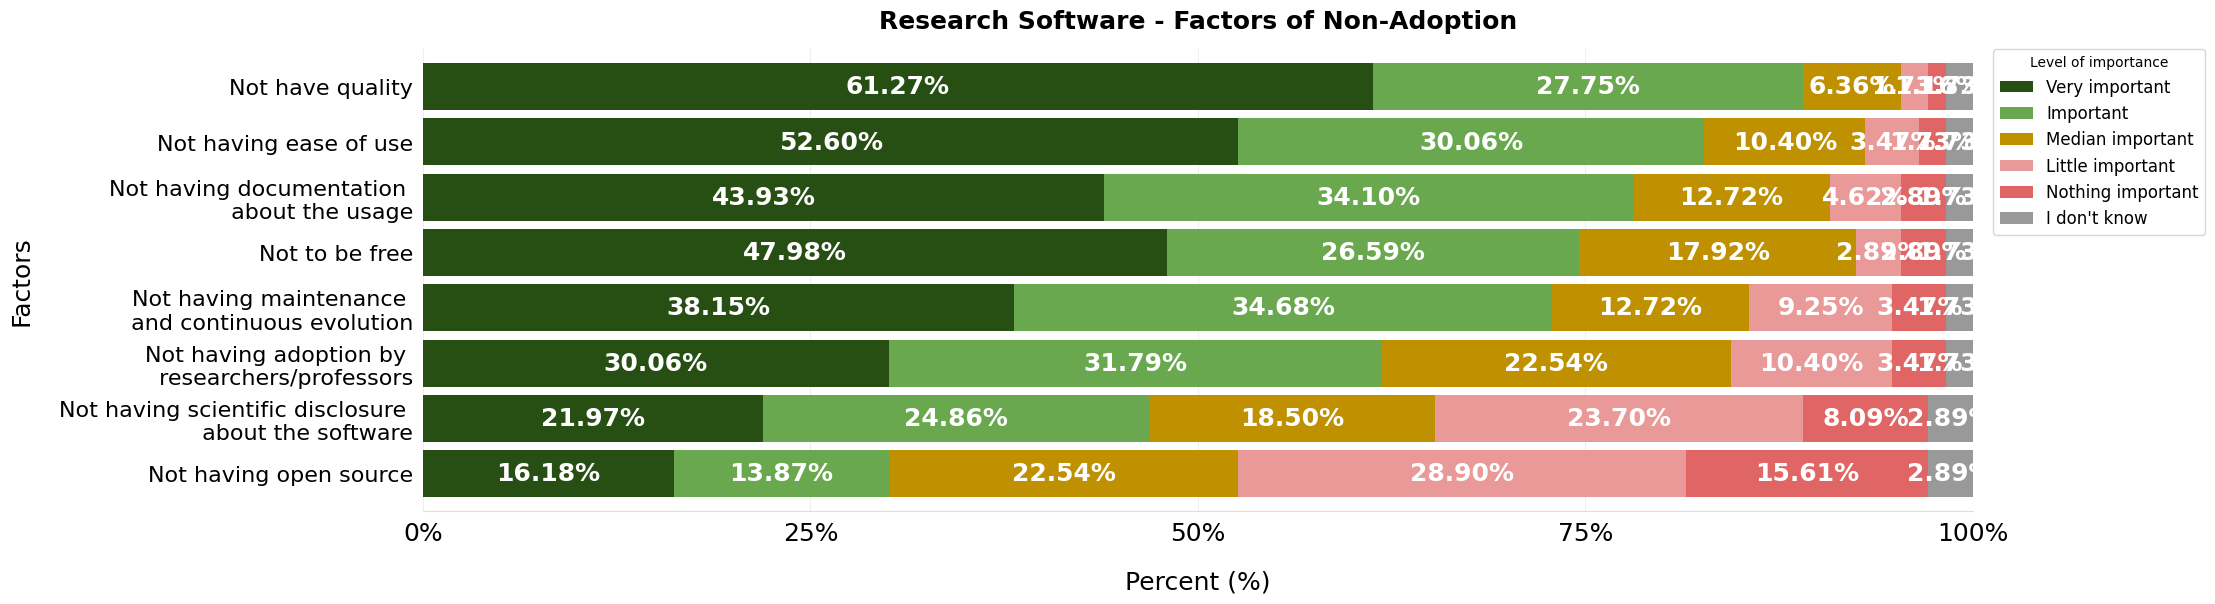

In [26]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Plot stacked horizontal bar chart
#df3_grafico.plot.barh(stacked=True, title="RS", xlabel ="Frequency", ylabel ="Factors" )
#plt.show()

#plotdata = df3_grafico
plotdata = df7
plotdata.head()


# Define a dictionary mapping variable values to colours:
colours = {"Very important": "#274E13", "Important": "#6AA84F", "Median important": "#BF9000", "Little important": "#EA9999", "Nothing important": "#E06666", "I don\'t know": "#999999"}

plt.rcParams["figure.figsize"] = (20, 6)
#plt.figure(figsize=(10,4))
#ax = plotdata.transpose().plot(kind="barh", stacked=True, color=colours).legend(loc='upper right', ncol=1, title="Level of importance", borderaxespad=0, bbox_to_anchor=(1.25, 1))

ax = plotdata.transpose().plot(kind="barh", stacked=True, color=colours, width=0.85, fontsize=16)



## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=18
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

   # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if width > 1:
      label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      # plot only when height is greater than specified value
      if height > 0:
         ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize, color='white', weight='bold')
    # plot only when width is greater than specified value <= 2
    #else:
     # if width >= 0:
     #   label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
     #  ax.text(label_x, label_y, label_text, ha='left', va='top', fontsize=FigBarsFontSize)
     # else:
     #   label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
     #   ax.text(label_x, label_y, label_text, ha='left', va='bottom', fontsize=FigBarsFontSize)


#comentado

    # The width of the bar is the data value and can be used as the label
#    label_text = ""
    # plot only when width is greater than specified value
#   if width > 2:
#     label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      # plot only when height is greater than specified value
#      if height > 0:
#         ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)
    # plot only when width is greater than specified value <= 2
#    else:
#      if width >= 1.70:
#        label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
#        ax.text(label_x, label_y, label_text, ha='left', va='top', fontsize=FigBarsFontSize)
#      else:
#       label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
#        ax.text(label_x, label_y, label_text, ha='left', va='bottom', fontsize=FigBarsFontSize)


    # plot only when height is greater than specified value
#    if height > 0:
#        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)




ax.legend(loc='upper right', ncol=1, title="Level of importance", borderaxespad=0, bbox_to_anchor=(1.15, 1), fontsize=12)

#for rowNum,row in ax.iterrows():
#    xpos = 0
#    for val in row:
#        xpos += val
#        ax.text(xpos + 1, rowNum-0.05, str(val), color='black')
#    xpos = 0

#for c in ax.containers:

    # customize the label to account for cases when there might not be a bar section
#    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c ]
        # set the bar label
#    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')

# add labels
#plt.xlabel("Percent (%)", labelpad=14, fontsize=12)
#plt.ylabel("Factors", labelpad=14, fontsize=12)


#ax = ax.sort_values(by=['Very important', 'Important'], ascending=False)



# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')


ax.set_xlim(0, 100)
ticks = ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(("0%", "25%", "50%", "75%", "100%"), fontsize=18)

# add labels
ax.set_title("Research Software - Factors of Non-Adoption", pad=15, fontsize=18, weight='bold')
ax.set_ylabel("Factors", labelpad=18, fontsize=18)
ax.set_xlabel("Percent (%)", labelpad=18, fontsize=18)
#plt.show()

plt.gca().invert_yaxis()

print ('\n \033[1m Horizontal Bar Chart - Research Software - Factors of Non-Adoption - Ordered by Combined Very Important and Important Ratings \033[0m')


fig.savefig('my_figure.png')